# How to calculate the gravity constant g

In [14]:
from manual_frame_selection import ManualFrameSelection
from ball_drop_trajectory import get_trajectory_in_pixels
from plot_g import PlotG


In [ ]:
video = ManualFrameSelection("videos/ball drop.mp4", True, 0.5)
video.play()

Total frames: 327, FPS: 29.994985547777944
End of video.


Now with a recording

In [ ]:
video = ManualFrameSelection("videos/ball drop.mp4", True, 0.5, "video and mask.mp4v")
video.play()

Total frames: 327, FPS: 29.994985547777944


So our best starting frame is 118 and the best ending frame is 201

In [12]:
positions_px, times = get_trajectory_in_pixels("videos/ball drop.mp4", True, 118, 201, 120)

print(positions_px)
print(times)

Total frames: 327, FPS: 29.994985547777944
[71, 71, 72, 73, 75, 78, 81, 83, 87, 92, 97, 104, 109, 115, 122, 129, 137, 145, 154, 165, 174, 185, 196, 207, 219, 232, 244, 257, 271, 285, 300, 315, 330, 346, 362, 379, 397, 414, 432, 451, 470, 489, 508, 528, 549, 570, 591, 613, 635, 658, 681, 704, 728, 752, 776, 801, 826, 852, 877, 903, 1591, 1623]
[0.0, 0.008333333333333333, 0.016666666666666666, 0.025, 0.03333333333333333, 0.041666666666666664, 0.05, 0.058333333333333334, 0.06666666666666667, 0.075, 0.08333333333333333, 0.09166666666666666, 0.1, 0.10833333333333334, 0.11666666666666667, 0.125, 0.13333333333333333, 0.14166666666666666, 0.15, 0.15833333333333333, 0.16666666666666666, 0.175, 0.18333333333333332, 0.19166666666666668, 0.2, 0.20833333333333334, 0.21666666666666667, 0.225, 0.23333333333333334, 0.24166666666666667, 0.25, 0.25833333333333336, 0.26666666666666666, 0.275, 0.2833333333333333, 0.2916666666666667, 0.3, 0.30833333333333335, 0.31666666666666665, 0.325, 0.3333333333333333,

Total frames: 327, FPS: 29.994985547777944

Estimated gravitational acceleration: 8.6462 m/s²


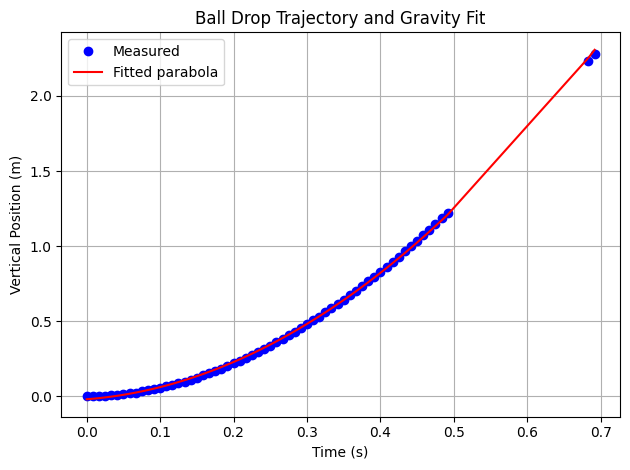

In [ ]:
positions_px, times = get_trajectory_in_pixels("videos/ball drop.mp4", True, 118, 201, 120)

floor_to_ceiling_distance_cm = 232
ball_diameter_cm = 4

PlotG(floor_to_ceiling_distance_cm, ball_diameter_cm, (positions_px, times))
